# Heart Disease Prediction
Andrew Kistner, Carmen Campagna, Rayan Abedin

Dataset can be found here: https://www.kaggle.com/fedesoriano/heart-failure-prediction

##### Attribute Information

- Age: age of the patient **[years]**
- Sex: sex of the patient **[M: Male, F: Female]**
- ChestPainType: chest pain type **[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]**
- RestingBP: resting blood pressure **[mm Hg]**
- Cholesterol: serum cholesterol **[mm/dl]**
- FastingBS: fasting blood sugar **[1: if FastingBS > 120 mg/dl, 0: otherwise]**
- RestingECG: resting electrocardiogram results **[Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]**
- MaxHR: maximum heart rate achieved **[Numeric value between 60 and 202]**
- ExerciseAngina: exercise-induced angina **[Y: Yes, N: No]**
- Oldpeak: oldpeak = ST **[Numeric value measured in depression]**
- ST_Slope: the slope of the peak exercise ST segment **[Up: upsloping, Flat: flat, Down: downsloping]**
- HeartDisease: output class **[1: heart disease, 0: Normal]**


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# read dataset into variable df
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Check for missing values and proper data types

In [2]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [3]:
# check for missing values, there are none
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Check for outliers in appropriate columns

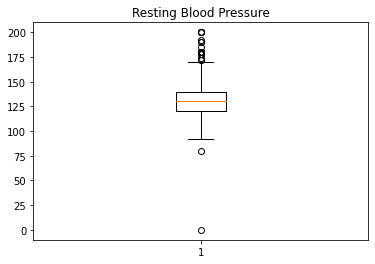

In [4]:
plt.boxplot(df['RestingBP'])
plt.title('Resting Blood Pressure')
plt.show()

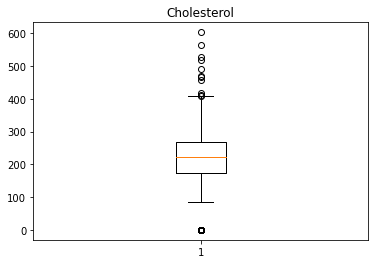

In [5]:
plt.boxplot(df['Cholesterol'])
plt.title('Cholesterol')
plt.show()

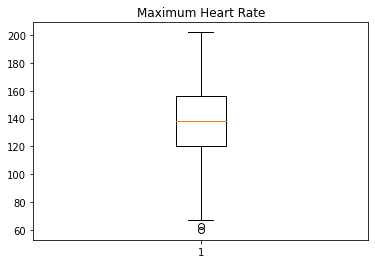

In [6]:
plt.boxplot(df['MaxHR'])
plt.title('Maximum Heart Rate')
plt.show()

**There is an outlier in the 'RestingBP' column where a patient's resting blood pressure is recorded as 0. This patient would be dead and therefore not useful to creating a model to predict heart disease based on measurements of heart health. We will remove this patient from the dataset.**

In [7]:
# get index of patient with 0 Resting Blood Pressure
bpmin = df['RestingBP'].idxmin()
# remove patient
df.drop(labels = bpmin, axis = 0, inplace = True)

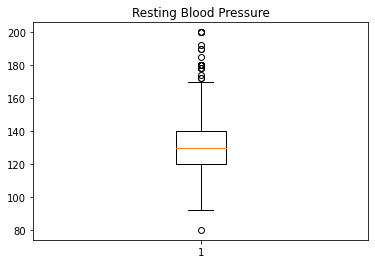

In [8]:
# test to show that we removed the patient with the 0 Resting Blood Pressure
plt.boxplot(df['RestingBP'])
plt.title('Resting Blood Pressure')
plt.show()

### Now that the data is clean, let's visualize it...

In [9]:
# descriptive statistics for Resting Blood Pressure
df['RestingBP'].describe()

count    917.000000
mean     132.540894
std       17.999749
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [10]:
df['Cholesterol'].describe()

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [11]:
df['MaxHR'].describe()

count    917.000000
mean     136.789531
std       25.467129
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

### **Plot the count of patients with and without heart disease in our dataset to make sure it is not heavily skewed in either direction**

[Text(0.5, 1.0, 'Number of Patients with (1) and without (0) heart disease')]

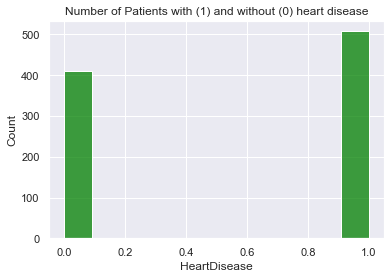

In [40]:
# check how many people have and do not have heart disease
sns.histplot(data=df, x="HeartDisease", color = 'green').set(title = 'Number of Patients with (1) and without (0) heart disease')

### Visualize the distribution of those who have heart disease according to their ages

[Text(0.5, 1.0, 'Heart disease according to age')]

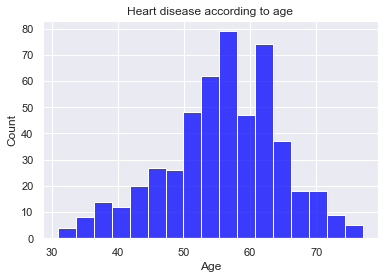

In [41]:
# Age distribution of those that have heart disease
hd = df.query("HeartDisease == 1")
sns.histplot(data=hd, x="Age", color = "blue").set(title = 'Heart disease according to age')

### Visualize the distribution of those who do NOT have heart disease according to their ages

[Text(0.5, 1.0, 'No heart disease according to age')]

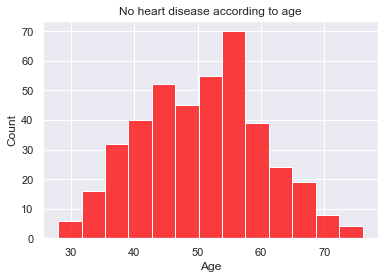

In [43]:
# Age distribution of those that have heart disease
nhd = df.query("HeartDisease == 0")
sns.histplot(data=nhd, x="Age", color = "red").set(title = 'No heart disease according to age')

### Heart disease patients and their cholesterol levels, normal cholesterol levels are around 200 mg/dL

[Text(0.5, 1.0, 'Heart disease patients and cholesterol levels')]

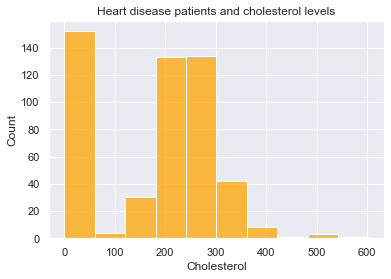

In [59]:
sns.histplot(data=hd, x="Cholesterol", color = "orange").set(title = 'Heart disease patients and cholesterol levels')

### Non-Heart disease patients and their cholesterol levels, normal cholesterol levels are around 200 mg/dL

[Text(0.5, 1.0, 'Non-heart disease patients and cholesterol levels')]

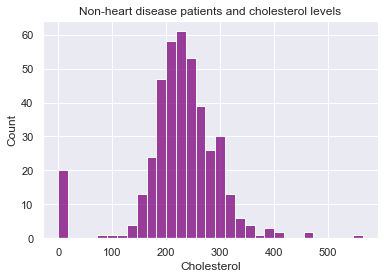

In [61]:
sns.histplot(data=nhd, x="Cholesterol", color = "purple").set(title = 'Non-heart disease patients and cholesterol levels')

### Which sex has more patients with heart disease?

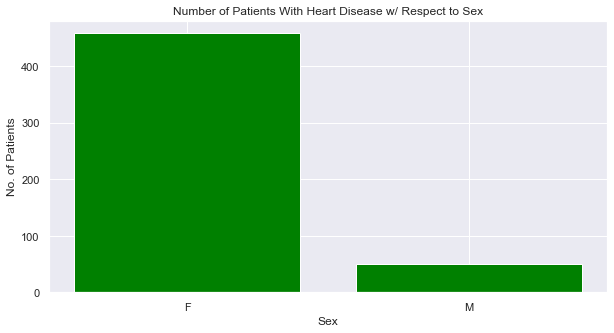

In [38]:
fig = plt.figure(figsize = (10, 5))
plt.bar(hd['Sex'].unique(), hd['Sex'].value_counts(), color ='green', width = 0.8)

plt.xlabel("Sex")
plt.ylabel("No. of Patients")
plt.title("Number of Patients With Heart Disease w/ Respect to Sex")
plt.show()

### Label encode categorical variables to prepare for building machine learning models

In [62]:
# change 'Sex' column to 1 == Male and 0 == Female to help when creating models later
df['Sex'].replace(['M','F'],[1,0],inplace=True)

# change 'ExerciseAngina' column to N == 0 and Y == 1 to help when creating models later
df['ExerciseAngina'].replace(['N', 'Y'],[0,1], inplace = True)

# convert categorical column 'ST_Slope' to numeric
df['ST_Slope'].replace(['Flat', 'Up', 'Down'], [0,1,2], inplace = True)

# convert categorical column 'ChestPainType' to numeric
df['ChestPainType'].replace(['ASY', 'NAP', 'ATA', 'TA'], [0,1,2,3], inplace = True)

# convert categorical column 'RestingECG' to numeric
df['RestingECG'].replace(['Normal', 'LVH', 'ST'], [0,1,2], inplace = True)

In [63]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,1,160,180,0,0,156,0,1.0,0,1
2,37,1,2,130,283,0,2,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,1,150,195,0,0,122,0,0.0,1,0


# Naive Bayes Model
- quick results
- works with categorical predictors
- produces a labeled, not a numeric, response variable

In [65]:
# define X and y
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 
        'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = df['HeartDisease']

In [66]:
# split X and y into test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

# training the logistic regression model on the training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [69]:
y_pred_class = nb.predict(X_test)

pd.Series(y_pred_class)
y_test.head()
temp = pd.concat([y_test,pd.Series(y_pred_class)], axis=1).dropna()


**Classification accuracy:** percentage of correct predictions

In [70]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8913043478260869


## AUC:
The percentage of the ROC plot that is underneath of the curve. AUC is useful indicator for classifier performance where the higher the value, the better the classifier. AUC represents the probability that the classifier will assign a higher predicted value to the positive observation.

[[65  9]
 [11 99]]
AUC:  0.9297297297297298


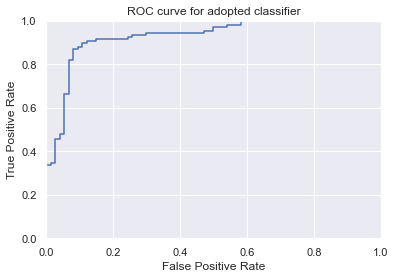

In [73]:
print(metrics.confusion_matrix(y_test, y_pred_class))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_class)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

y_pred_prob = nb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title("ROC curve for adopted classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
print("AUC: ", (metrics.roc_auc_score(y_test, y_pred_prob)))

## Support Vector Machines (SVM) Model
- predicting a category (yes heart disease or no heart disease)
- smaller dataset, this algorithm takes a long time to run on large datasets
- mixture of categorical and discrete data to make a prediction

In [74]:
# define X and y
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 
        'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = df['HeartDisease']

In [75]:
# split X and y into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

from sklearn import svm

svmodel = svm.SVC()

#fit model
svmodel.fit(X_train, y_train)

#make prediction for the testing set
y_pred_class = svmodel.predict(X_test)

**Based on the accuracy metrics, SVM performed much worse than Naive Bayes**

In [77]:
print(metrics.accuracy_score(y_test, y_pred_class))
print("AUC: ", metrics.roc_auc_score(y_test, y_pred_class))

0.7228260869565217
AUC:  0.7217444717444718


### Random Forest Model
- used frequently for data related to medicine 
- works with categorical and discrete data by creating multiple trees
- can be used as a classification or regression model

In [78]:
from sklearn.ensemble import RandomForestClassifier

# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

# fit model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

**Model's Accuracy Score:**

In [80]:
# make predictions for the testing set
y_pred = model.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8967391304347826


**Attempt K-fold cross validation...**

In [81]:
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

model.fit(X, y)

RandomForestClassifier(max_depth=10, random_state=1)

In [82]:
# Perform 10-fold cross validation
kf = KFold(n_splits=10, random_state=1, shuffle=False)
scores = cross_val_score(model, X, y, cv=kf)
print('Cross-validated scores:', scores)

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Cross-validated scores: [0.91304348 0.90217391 0.94565217 0.85869565 0.90217391 0.92391304
 0.85869565 0.77173913 0.8021978  0.78021978]


**Find the mean of the cross-validated scores...**

In [83]:
print("Mean: ", scores.mean())

Mean:  0.8658504538939322


## Let's make some predictions with our chosen inputs...

In [84]:
# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

# fit model
model.fit(X, y)

RandomForestClassifier(max_depth=10, random_state=1)

### Predictors
- Age: age of the patient **[years]**
- Sex: sex of the patient **[M: Male, F: Female]**
- ChestPainType: chest pain type **[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]**
- RestingBP: resting blood pressure **[mm Hg]**
- Cholesterol: serum cholesterol **[mm/dl]**
- FastingBS: fasting blood sugar **[1: if FastingBS > 120 mg/dl, 0: otherwise]**
- RestingECG: resting electrocardiogram results **[Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]**
- MaxHR: maximum heart rate achieved **[Numeric value between 60 and 202]**
- ExerciseAngina: exercise-induced angina **[Y: Yes, N: No]**
- Oldpeak: oldpeak = ST **[Numeric value measured in depression]**
- ST_Slope: the slope of the peak exercise ST segment **[Up: upsloping, Flat: flat, Down: downsloping]**

### Response Variable

- HeartDisease: output class **[1: heart disease, 0: Normal]**

### Fictional Case Study:
A patients walks into the emergency room with chest pains. Several tests are run and measurements for the each of the predictors listed above are recorded. They are as follows:
- Age: 55
- Sex: F (0)
- Chest Pain Type: TA (3)
- Resting BP: 175
- Cholesterol: 225
- Fasting Blood Sugar: 0
- Resting ECG: Normal (0)
- Max Heart Rate: 180
- Exercise Angina: Yes (1)
- Old Peak: 1.0
- ST Slope: Down (2)

Doctors will use the random forest model to input these heart health metrics to help make a diagnosis for heart disease for this particular patient.

In [86]:
inputs = np.array([[55, 0, 3, 175, 225, 0, 0, 180, 1, 1.0, 2]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)

Predicted ouctome based on known data:  [0]


**The random forest model produced a 0 response variable, which says the model predicts that this patient does not have heart disease. The stronger the model, the more trust Doctors can have with a given prediction. The random forest model was very close in accuracy to naive bayes and both of these models could be described as "good" but not necessarily "great". These models will most likely make accurate predictions 90-92% of the time. Although, in the medical field there should not be complete trust in a model that can misdiagnose a patient 8-10% of the time.**